# Clean and Analyze Employee Exit Surveys

We'll work with exit surveys from employees of the `Department of Education, Training and Employment (DETE)` and the `Technical and Further Education (TAFE)` institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE here. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

1. `ID:` An id used to identify the participant of the survey

2. `SeparationType:` The reason why the person's employment ended

3. `Cease Date:` The year or month the person's employment ended

4. `DETE Start Date:` The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

1. `Record ID`: An id used to identify the participant of the survey

2. `Reason for ceasing employment`: The reason why the person's employment ended

3. `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them

In [1]:
#Import pandas and numpy
import pandas as pd
import numpy as np

#Read the CSV files on the system
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#Print information about the dataframes
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

Let us check for any missing values in `dete_survey`
Out of our columns of interest, all 822 entries are non-null values. 


In [3]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Herein, we cansee that both the dataframes are rather comprehensive with questions whcih would cover the experiences of the employees during their stint at the organization. 


Let us check for any missing values in `tafe_survey`
Out of our columns of interest: `LengthofServiceOverall. Overall Length of Service at Institute (in years)` has only 596 null values of the total 702 entries
`Reason for ceasing employment` has 701 non-null values which essentially means that we have 1 value missing there as well. 

## Data Cleaning

These non null values are only values with `NaN` however there are some values which are written as 'Not Stated' instead of our standard `NaN`so let's just read the files again and this time we will set all `na_values` parameter in read_csv to set all values as `NaN`. 


In [5]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

Indeed the `Cease Date` and the `DETE Start Date` have more missing values now. 

Currently there are way too many columns which we do not require. Let us start off by eliminating the columns which we dont require from our dataframe and then move forward. We will drop these using the `drop()` method. We will be droping column from index 28 to 48.

In [6]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [7]:
#Following same procedure for tafe_survey

tafe_survey = pd.read_csv('tafe_survey.csv', na_values = "Not Stated")

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

## Renaming Columns

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names.

In [8]:
#Renaming the dete_survey_updated columns

dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip()

#Manually updating one column to snakecase as there is no space in between
dete_survey_updated.rename(columns = {'separationtype':'separation_type'}, inplace = True)


In [9]:
#Renaming the tafe_survey_updated columns

col_rename = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separation_type','Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(columns = col_rename, inplace = True)

If we look at the unique values in the `separation_type` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `Resignation`.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

1. Resignation-Other reasons
2. Resignation-Other employer
3. Resignation-Move overseas/interstate

In [10]:
#Counting unique values in seperation_type

print(dete_survey_updated['separation_type'].value_counts())

print(tafe_survey_updated['separation_type'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64


In [11]:
#Consolidating all columns with Resignations 

dete_survey_updated['separation_type'] = dete_survey_updated['separation_type'].str.split('-').str[0]
dete_survey_updated['separation_type'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separation_type, dtype: int64

In [12]:
#Extracting only the employees who have resigned to a new dataframe

dete_resignations = dete_survey_updated[dete_survey_updated['separation_type'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separation_type'] == 'Resignation'].copy()

In [13]:
dete_resignations.head(3)

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_resignations.head(3)

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10


As it would be more specific for us to analyze the Employee exit by classifying them based on the reason of exit, here we have only considered `Resignagtion` as the criteria which has over 300 values in both the cases. 

### Check For Data Consistency

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way!

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

Let's focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. 

In [15]:
#Check for cease_date in dete_resignations

dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [16]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float64')

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [18]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

2006-2014 seems like an adequate bracket for the cease dates and we seem to have no overtly abrupt value in out dataset. Similarly 1963-2013 seems like a decent starting date as well.

However, using some transformations we are now only returning the year instead of the month because the monthly values were not uniform in this case. 

Let us now look at similar transformations for the tafe_resignations

In [19]:
#Check for cease_date in tafe_resignations

tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

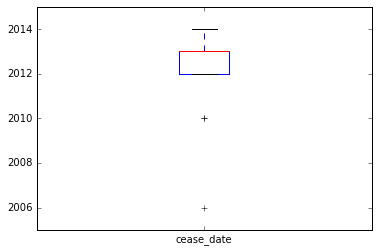

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt 

dete_resignations['cease_date'].plot(kind='box', ylim=(2005,2015))

plt.show()

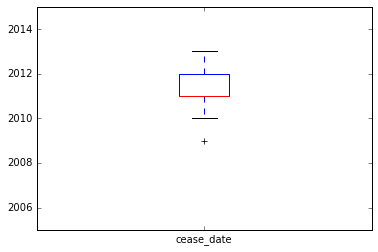

In [21]:
tafe_resignations['cease_date'].plot(kind='box', ylim=(2005,2015))

plt.show()

In [22]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].value_counts().sort_index()


0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

Here, in order to ensure that none of the employees have a `cease_date` prior to their `dete_start_date` we subtracted the two and found that all values existing currently are postive and hence can be somewhat certain that the values are not erroneous (atlease at the first glance) 

The only dicey values seem to be the one where the employment duration is 42 and 39 years as it seems too long a committment (Apologies for my Gen Z behaviour/thought pattern). However, it does seem possible. 

### Digging into the Reason for Resignation

Let us look into employees who have resigned because of `job dissatisfaction`

Both our dataframes are very comprehensive (borderline qualitative) and have several factors which we can take into onsideration while we are trying to indentify dissatifaction. 


1. tafe_survey_updated: 

    <ul>
    <li>`Contributing Factors. Dissatisfaction` </li>
    
    <li>`Contributing Factors. Job Dissatisfaction` </li>
    </ul>
    
    
2. dete_survey_updated:
    <ul>
    <li>`job_dissatisfaction` </li>
    
    <li>`dissatisfaction_with_the_department` </li>
    
    <li>`physical_work_environment` </li>
    
    <li>`lack_of_recognition`</li>
    
    <li>`lack_of_job_security` </li>
    
    <li>`work_location` </li>
    
    <li>`employment_conditions` </li>
    
    <li>`work_life_balance` </li>
    
    <li>`workload` </li>
    
    </ul>
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

We will make a new column namely `dissatisfied` based on the answers to the columns mentioned above and this would be the legend if one wishes to read the Series on their own


   <ul>
   <li> `True`: indicates a person resigned because they were dissatisfied with the job</li>
   <li> `False`: indicates a person resigned because of a reason other than dissatisfaction with the job </li>
   <li> `NaN`: indicates the value is missing </li>

In [23]:
#Analyzing the Series in tafe_resignations 

print(tafe_resignations['Contributing Factors. Dissatisfaction']. value_counts())

print(tafe_resignations['Contributing Factors. Job Dissatisfaction']. value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [24]:
#Defining a function to update True, False and NaN values into the columns 
def update_vals(value):
    if pd.isnull(value):
        return np.NaN
    elif value == '-':
        return False
    else:
        return True
        
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [25]:
#There are no NaN values in dete_resginations and they are already in boolean form hence the function is not required for detE_resignations

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment','lack_of_recognition', 'lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis = 1)
dete_resignations_up = dete_resignations.copy()
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

##### Observations:

1. There are **91 people** in our dataframe of `tafe_resignations`. which means that **91 people** have resigned from their service due to Job Dissatisfaction
2. There are **149 people** in our dataframe of `dete_resignations`. which means that **149 people** have resigned from their service due to Job Dissatisfaction

To recap, we've accomplished the following:

1. Renamed our columns
2. Dropped any data not needed for our analysis
3. Verified the quality of our data
4. Created a new institute_service column
5. Cleaned the Contributing Factors columns
6. Created a new column indicating if an employee resigned because they were dissatisfied in some way

In [26]:
#Now the recombining of the columns but first lets add a column to each dataframe

dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

In [27]:
#Combining both Data Frames 

combined = pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index = True)

In [28]:
#Let us see the new combined dataframe and drop all values with less than 500 non null values

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [29]:
combined_updated = combined.dropna(thresh = 350, axis = 1)

combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separation_type      651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms:

To analyze the data, we'll convert these numbers into categories

1. New: Less than 3 years at a company
2. Experienced: 3-6 years at a company
3. Established: 7-10 years at a company
4. Veteran: 11 or more years at a company

In [30]:
combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .astype(str)
                                         .str.extract(r'(\d+)')
                                         .astype(float))
combined_updated['institute_service'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [31]:
def map_values(x):
    if pd.isnull(x):
        return np.nan
    elif x<3:
        return 'New'
    elif x<7:
        return 'Experienced'
    elif x<11:
        return 'Established'
    else:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_values)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [33]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [34]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False).copy()
combined_updated['dissatisfied'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


False    411
True     240
Name: dissatisfied, dtype: int64

In [35]:
plot1 = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')


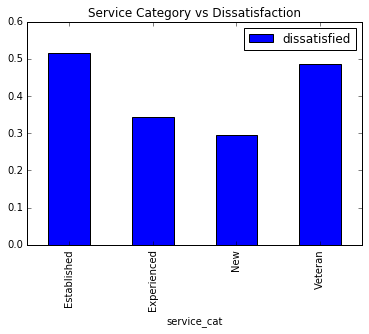

In [36]:
%matplotlib inline

plot1.plot(kind = 'bar', title = 'Service Category vs Dissatisfaction')

Evidently we cansee that Established and Veterans are more dissatisfied by their workplace/work conditions.

1. **51%** Established employees who quit were dissatisfied by their work
2. **48%** Veteran employees who quit were dissatisfied by their work

### Analysis on the basis of Age

#### Q1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Now let us specifically look at this and try to answer this question after doing to basic analysis.

#### Let us start with 'TAFE'

We would considered employees who have worked for a `short period of time` to be only employees in the `New` and `Established` Service Category

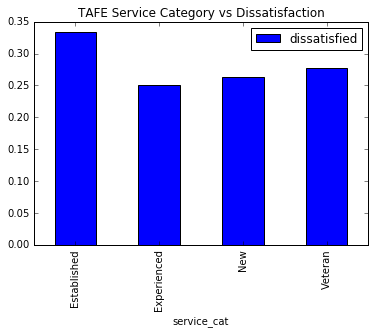

In [37]:
#Let us create a new df with only TAFE
new_plot = combined_updated[combined_updated['institute']=='TAFE']

#Analyzing them based on their service category
plot4 = new_plot.pivot_table(index = 'service_cat', values = 'dissatisfied')

plot4.plot(kind = 'bar', title = 'TAFE Service Category vs Dissatisfaction')

#### Observations:
1. `Established` employees in TAFE were the most dissatisfied with **34%** employees who left the company. 
2. `Experienced` employees were the least dissatisfied with roughly **25%** 
3. However, all things considered, the percentage from the categories `New` and `Established` employees is higher than that among `Veterans` and `Experienced` employees

So the alswer to the question would be a **`Yes`** for "TAFE"

#### Now lets take a look at "DETE"

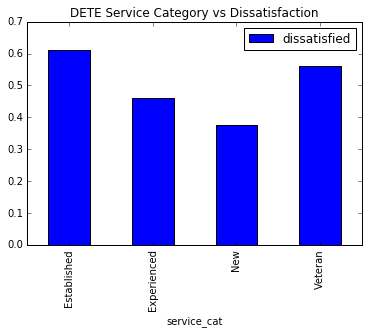

In [38]:
#Let us create a new df with only DETE
new_plot2 = combined_updated[combined_updated['institute']=='DETE']

#Analyzing them based on their service category
plot5 = new_plot2.pivot_table(index = 'service_cat', values = 'dissatisfied')

plot5.plot(kind = 'bar', title = 'DETE Service Category vs Dissatisfaction')

#### Observations:
1. `Established` employees in DETE were the most dissatisfied with **60%** employees who left the company. 
2. `New` employees were the least dissatisfied with roughly **37%** 
3. However, all things considered, the percentage from the categories `New` and `Established` employees is lower than that among `Veterans` and `Experienced` employees

So the alswer to the question would be a **`NO`** for "DETE"

#### Q2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?



In [39]:
#Analyzing for Age

combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Here we have quite a few ranges as well as quite a few null values.

Let us classify then as follows

1. Generation Z - Employees with age below 20
2. Millennials - Employees between the ages 21-35
3. Generation X - Employees from ages 36-50
4. Baby Boomers - Employees above the age of 50

In [40]:
combined_updated['age'] = combined_updated['age'].astype(str).str.replace(' ','-')
combined_updated['age'] = combined_updated['age'].str.replace('--','-')
combined_updated['age'] = combined_updated['age'].str.split('-').str[0].astype('float')

combined_updated['age'].value_counts(dropna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age, dtype: int64

In [41]:
def new_values(x):
    if pd.isnull(x):
        return np.nan
    elif x<=20:
        return 'Generation Z'
    elif x<=35:
        return 'Millennial'
    elif x<=50:
        return 'Generation X'
    else:
        return 'Baby Boomer'
    
combined_updated['age_cat'] = combined_updated['age'].apply(new_values)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
plot2 = combined_updated.pivot_table(index = 'age_cat', values = 'dissatisfied')

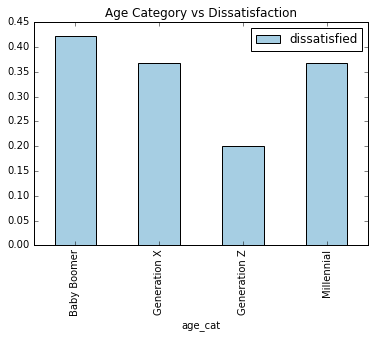

In [43]:
plot2.plot(kind = 'bar', title = 'Age Category vs Dissatisfaction', colormap = 'Paired')

Now here we can see that in general Baby Boomers seem the most dissatisfied followed by Millennials and Generation X. 
This is not generalizable in any case, however it does seem to be true in this particular case.

Let us understand this phenomenon for TAFE AND DTE Individually.

#### analyzing for "TAFE"

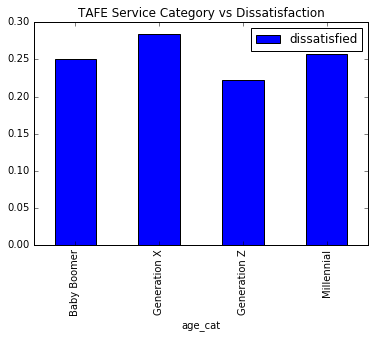

In [44]:
#Let us create a new df with only DETE
new_plot3 = combined_updated[combined_updated['institute']=='TAFE']

#Analyzing them based on their service category
plot_tafe = new_plot3.pivot_table(index = 'age_cat', values = 'dissatisfied')

plot_tafe.plot(kind = 'bar', title = 'TAFE Service Category vs Dissatisfaction')

#### Observations
1. Generation X (35-50) are the most dissatisfied and hence they risign with almost 28% employees
2. Generation Z is the least dissatisfied and hence they resign with aroundf 23% of the employees. 

If we group Baby Boomers and Gen X and additionally also group Gen Z and Millennials, then we could observe that the resignation trends are similar and do not show any huge amount of change for TAFE.

#### Now let's analuyze for "DETE"

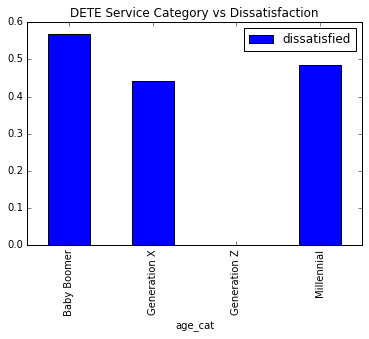

In [45]:
#Let us create a new df with only DETE
new_plot5 = combined_updated[combined_updated['institute']=='DETE']

#Analyzing them based on their service category
plot_dete = new_plot5.pivot_table(index = 'age_cat', values = 'dissatisfied')

plot_dete.plot(kind = 'bar', title = 'DETE Service Category vs Dissatisfaction')

Whoa! This goes to show that no one (or barely anyone) in DETE is less than 20 years of age as the Gen Z column is zero! 

Moreover, `Baby Boomers` are the most dissatisfied, followed by `Millennials` and then `Gen X`. 

#### Concluding thoughts: 

1. So here we can say that the older population is `more dissatisfied` and hence resign as compared to the younger crowds. But not by a mile. The number of employees who are dissatisfied to an extent is in and around the ballpark of **45-60%** which is essentially something that does show that corporates do need to make efforts in keeping their employees happy. 


2. Moreover, considering the facts that `Veterans` and `Established` employees are dissatisfied almost as much as the newbies would go on to show that the corporate might have a tough time living up to making the employees feel valued after their long years of service. 

3. Younger employees are considered to m=be more dynamic and people preferring better working conditions and 'work-life' balance which would essentially make their outflow a bit more predictable. However as we see the outflow of `Veterans` and `Established` employees which would also go hand in hand with `Baby Boomers` and `Gen X`, the underlying reason between their outflow (as they are assumed to pursue stability and loyalty) is something that needs to be looked into. 

Overall, while this quantitative data gives us a significant overview of the direction in which the trend is moving, this quanititative analysis would be incredibly helpful if complimented with a qualitative analysis of the employees to understand the underlying patterns and causes in more depth. 